<a href="https://colab.research.google.com/github/jiwoong2/deeplearning/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열데이터 분류
단순 주가 데이터는 유효한가? 과거의 주가 데이터가 미래의 주가향방을 충분히 설명하는가?

이번 프로젝트에서는 과거의 주가데이터를 기반으로 미래의 주가 방향을 4가지 클래스로 분류하는 여러가지 딥러닝 모델(RNN. LSTM, custom)을 만들어보고 구체적인 목적을 가지고 실제 모델을 구현하는 과정에서 일어나는 오류들을 기록하고 그 문제점을파악하거나 극복하는 것을 목적으로 한다.

# 순서


1.   데이터 스케일링
2.   오버피팅
3.   최빈값을 갖는 라벨을 그대로 출력하는 현상
4.   특정구간에서 accuracy 그래프의 진동이 커지는 현상
5.   불완전한 데이터와 라벨
6.   결론







In [ ]:
from PIL import Image
from google.colab import drive
from IPython.display import display
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 스케일링

프로젝트에서 데이터를 인덱싱한 방법은 랜덤한 인덱스를 기준으로 과거 일정기간동안의 주가데이터묶음을 데이터로하고 미래 일정기간의 주가변동률을 4가지 클래스로 구분해 라벨로한다.

문제는 주가가 지수적으로 증가하고 데이터를 한종목에서 추출하지 않았다는 점 이다. 데이터를 통째로 표준화하게 되면 랜덤하게 인덱싱된 데이터샘프들의 스케일이 일정하지 않게 된다. 해서 2가지 해법을 찾았는데 하나는 증감률로 데이터를 전처리한뒤 통째로 표준화한후 샘플링하는 것 이고 다른하나는 샘플링을 먼저 실행한후 각 샘플별로 표준화하는 것 이다.

이 프로젝트에서는 샘플별로 표준화하는 방법을 사용한다.

# 2.오버피팅

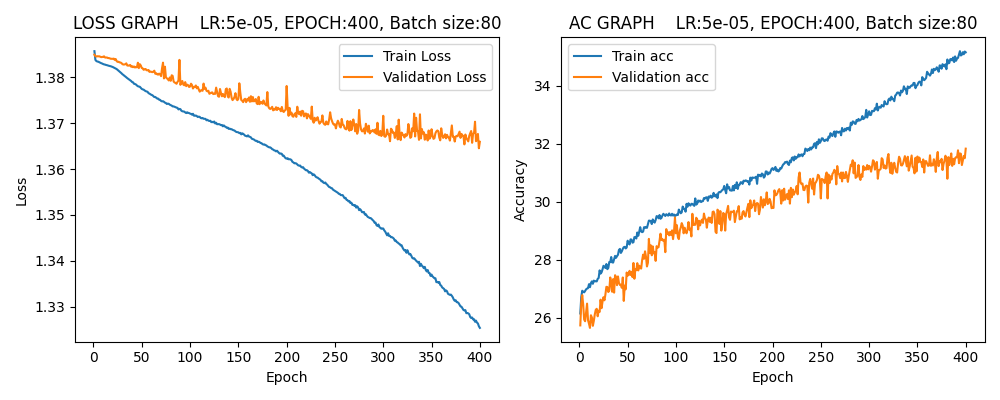

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/라벨변경그래프-1.png.png"
image = Image.open(image_path)
display(image)

프로젝트를 진행하며 가장많이 관찰한 학습 양상이다. 특히 그리드서치 전 초기 실험에서 가장많이 관찰됐으며 데이터셋이 큰데 작은 배치사이를 사용하거나 모델 파라미터가 너무 많은 경우 대부분 오버피팅을 일으켰다.

특히 컨볼루션레이어를 적용한 커스텀 모델은 모든 시간에서 같은 파라미터 공유하는 RNN이나 LSTM과 달리 짧은주기부터 긴주기까지 피처맵을 늘려가고, 각 주기마다 다른 파라미터를 사용하므로 파라미터 수가 상대적으로 많을 수 밖에 없었다. 2D드롭아웃레이어와 말단의 분류부분의 파라미터를 순차적으로 줄이며 복잡도를 낮췄음에도 오버피팅현상을 막을 수 없었다.

# 최빈값을 갖는 라벨만을 그대로 출력하는 현상

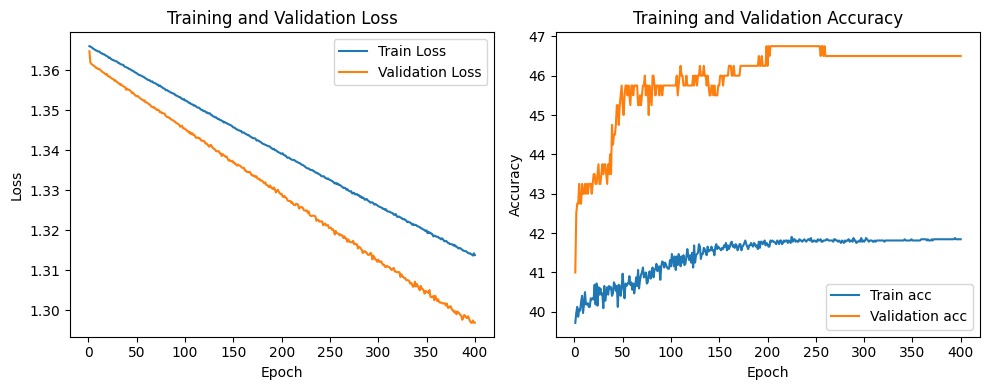

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/최빈라벨.png"
image = Image.open(image_path)
display(image)

모델의 acurracy그래프가 특정구간에서 완전히 일정해지는 현상을 관찰했다. 밑의 특정구간에서 진동폭이 커지며 정체되는 현상과 구분되는점은 그래프의 진동이 없으며 완전히 일정하다는 것 이다. 모델의 출력을 확인해본 결과 모델은 최빈값을 갖는 라벨만을 출력했는데 데이터 불균형이 그 원인이었다.

라벨 0(5%이상 급락)이나 3(5%이상 급등)을 갖는 데이터가 1이나 2를 갖는 데이터에 비해 아주 부족했는데 가 라벨별 로스값에 가중치를 부여함으로써 어느정도 해결됬고 후에 데이터를 대폭 늘리고 언더샘플링으로 비율을 맞춤으로써 완전히 해결되었다.

* 위 그래프는 프로젝트초기에 주가 방향을 +(1),-(0)로 구분하는 이진분류모델의 학습그래프로 빈도수가높은 라벨1만을 출력하는 방식으로 학습됐다.

# 4.특정구간에서 검증데이터에관한 accuracy, loss 그래프의 진동폭이 커지며 정체되는 현상

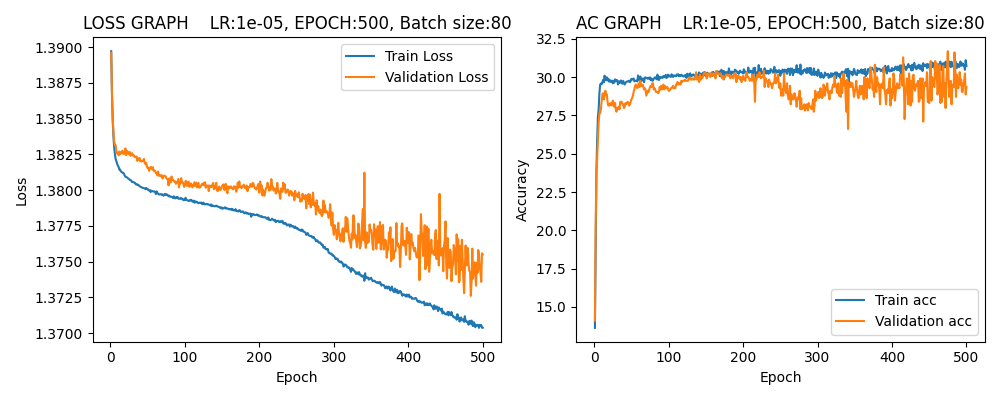

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/특정구간그래프진동rnn.png"
image = Image.open(image_path)
display(image)

위 그래프는 프로젝트의 RNN모델 훈련양상이며 살펴보면 보면 검증데이터에 관한 loss 그래프와 특히 accuracy 그래프가 특정 구간에서 더 이상 학습돼지 못 하고 진동하는 양상을 보인다.

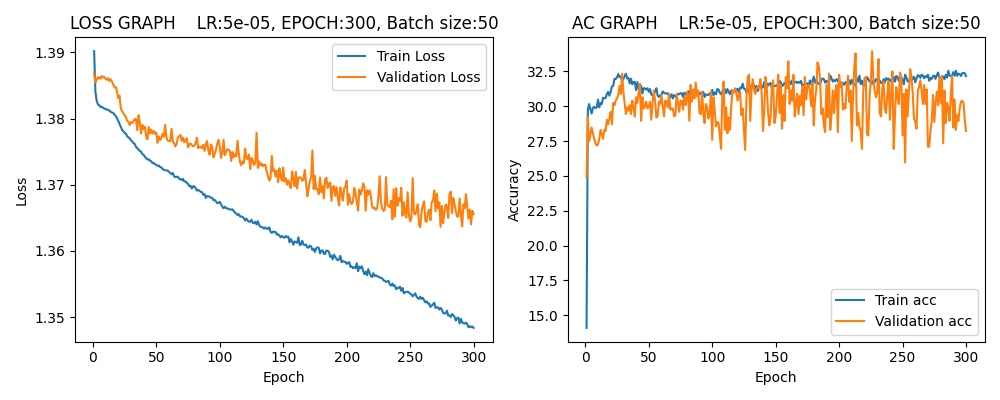

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/특정구간그래프진동LSTM1.png"
image = Image.open(image_path)
display(image)

LSTM모델의 훈련에서도 같은 양상을 보이는 그래프가 그려졌는데 하이퍼 파라미터 그리드서치 결과(에폭, 배치 사이즈, 학습율) 좋은양상을 보이는 하이퍼파라미터조합을 찾아도 accuracy는 30부근, loss는 1.380에서 1.375부근에서 더이상 성능이 향상돼지 못 하고 진동하기시작한다.

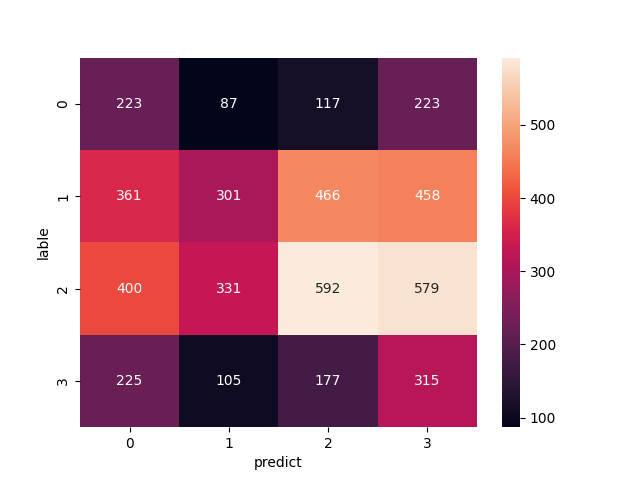

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/특정구간그래프진동LSTM1-1.png"
image = Image.open(image_path)
display(image)

In [ ]:
print(f"0에대한 정확도 : {223/(223+361+400+255) *100}")
print(f"1에대한 정확도 : {301/(87+301+331+105) *100}")
print(f"2에대한 정확도 : {592/(117+466+592+177) *100}")
print(f"3에대한 정확도 : {315/(223+458+579+315) *100}")

0에대한 정확도 : 17.998385794995965
1에대한 정확도 : 36.529126213592235
2에대한 정확도 : 43.786982248520715
3에대한 정확도 : 20.0


혼동행렬을보면 이전의 최빈라벨만을 출력하는 현상은 아니지만 주가 흐름상 특이점이라 부를만한 구간, 라벨값 3(5%이상 상승)과 라벨값0(-5%이상 하락)에 대한 에측률이 현저히 떨어지는걸 확인할 수 있다.

가장 먼저 생각해볼 수 있는건 데이터 불균형이다. 라벨값 0,3을 갖는 샘플수는 1,2를 갖는 샘플수보다 현저히 적은데 이를 극복하고자 가 라벨이 만들어내는 로스값에 가중치를 부여했지만 모델이 학습할 수 있는 데이터의 양 자채가 작으므로 위와 같은 현상이 일어난다고 가정해볼 수 있다.

두번째로 생각해볼수 있는것은 라벨값 3, 0에 대한 데이터설명부족이다. 주가가 5%이상 급상승하거나 급하락하는 경우는 그 원인이 주가상 표시될 수 없는 외부의 요인일 수 있다.

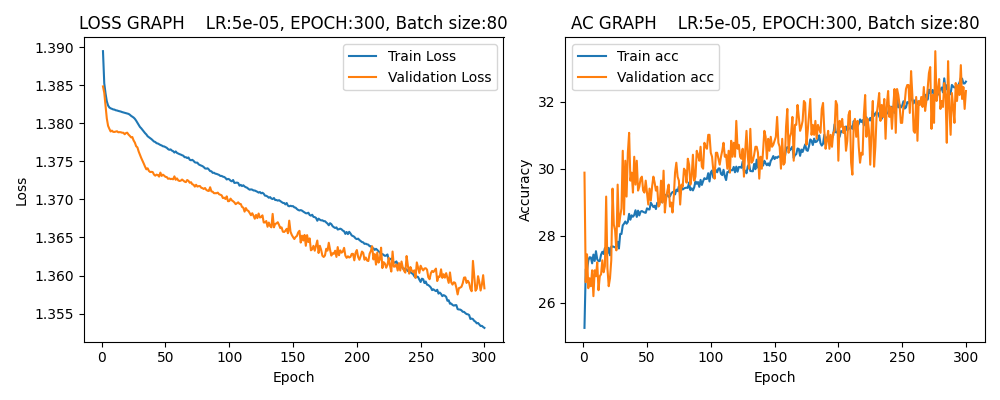

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/특정구간그래프진동LSTM2.png"
image = Image.open(image_path)
display(image)

위 그래프는 데이터증강후 샘플수가 가장적은 라벨0에 해당하는 데이터를 기준으로 언더샘플링한 데이터셋으로 훈련한 LSTM모델의 학습 그래프다.

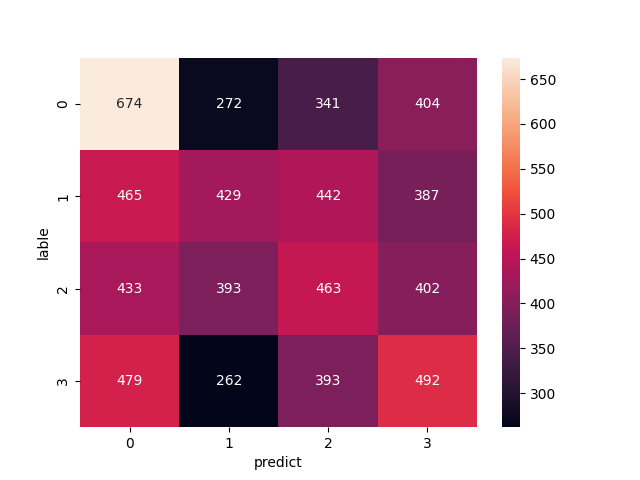

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/특정구간그래프진동LSTM2-1.png"
image = Image.open(image_path)
display(image)

In [ ]:
print(f"0에대한 정확도 : {674/(674+465+433+479) *100}")
print(f"1에대한 정확도 : {429/(272+429+393+262) *100}")
print(f"2에대한 정확도 : {463/(341+442+463+393) *100}")
print(f"3에대한 정확도 : {492/(404+387+402+492) *100}")

0에대한 정확도 : 32.86201852754754
1에대한 정확도 : 31.63716814159292
2에대한 정확도 : 28.248932275777918
3에대한 정확도 : 29.198813056379823


그래프의 진폭은 여전히 크지만 0과 3에대한 accuracy가 1, 2에대한 accuracy와 비슷해졌다. 하지만 데이터 증강으로 라벨 0과 3에대한 데이터수는 많아졌지만 언더샘플리으로 라벨 1, 2을 갖는 데이터는 상대적으로 적어져서인지 라벨 1, 2 대한 정확도는 떨어졌다.

그래프의 학습양상이 좋아보이므로 에폭을늘려 학습을 더 진행시켜보면

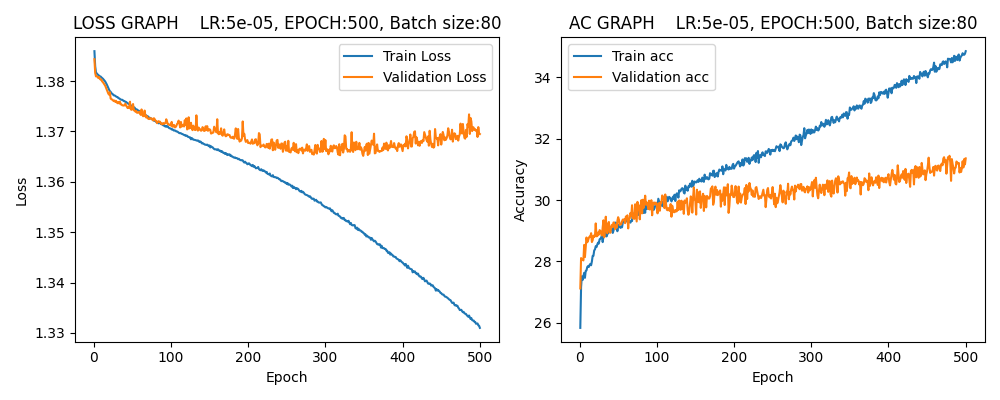

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/특정구간그래프진동LSTM4.png"
image = Image.open(image_path)
display(image)

이처럼 오버피팅이 진행된다. 이런현상은 계속해서 관찰됐고 모델의 성능이 더 이상 향상돼지 않았다. 특히 위 그래처럼 accuracy 30부근에서 loss는 증가하지만 accuracy는 약간 증가하는 경향을 보이는데 그래프도 자주 관찰됐는데 이런현상은 아마 데이터가 라벨을 충분히 설명하지 못 하거나 라벨자체가 불완전해서 일어나는 현상으로 생각된다

# 5.불완전한 데이터와 라벨

여러실험으로 데이터자체에 문제가 있음이 의심된다. 데이터가 라벨을 충분히 설명하지 못 하거나 라벨자체가 문제일 수 있다. 주가는 정량적으로는 측정이 어려운 수 많은 외부요인의 영향을 받기 때문에 주가데이터만으로 라벨을 충분히 설명하지 못 할 것이다. 주가의 방향은 그 주기가 짧을수록 의미없이 랜덤한 값을 갖으므로 이 프로젝트에서 라벨로사용한 5일간의 주가 등락률은 라벨로서 적절치 않을 수 있다.

주가 데이터 외 주가에 영향을 줄만한 비정형데이터들을 수집하고 모델을 훈련시킬 수 있게 가공하는것은 너무 어려운일이므로 라벨을 더 긴 텀으로 수정해서 실험을 이어가본다.

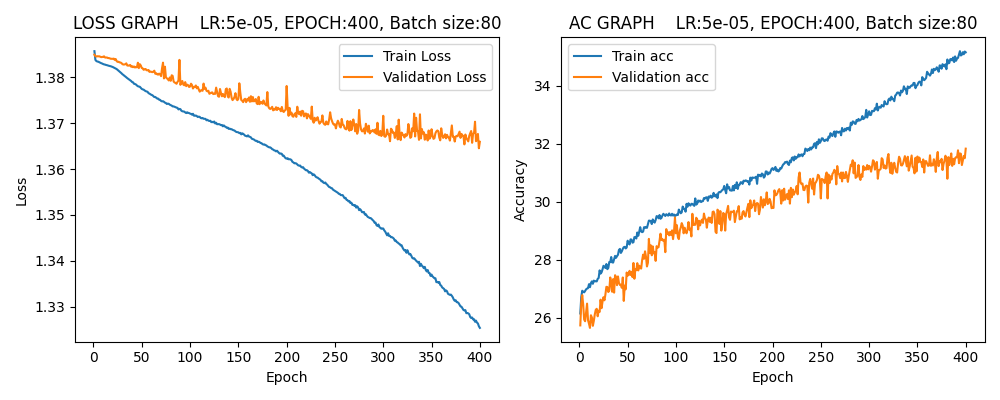

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/라벨변경그래프-1.png.png"
image = Image.open(image_path)
display(image)

위 그래프는 모델의 입력 데이터를 20일치에서 40일치로, 라벨을 5간의 주가등락률에서 20일간의 주가 등락률로 변경한후 데이터를 대폭 증강한후 훈련한 학습 그래프이다.

데이터가 대폭 증가함에 따라 작은 배치사이즈가 오버피팅을 일으키고 있다.

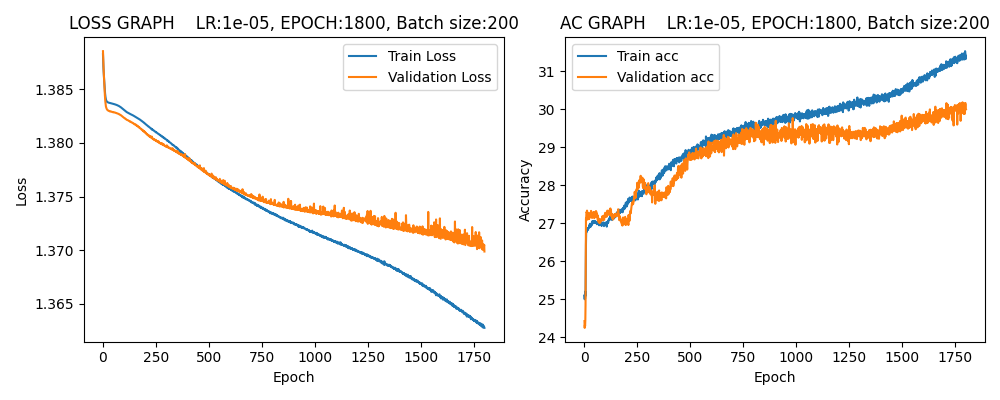

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/시계열모델학습시켜보기/graph/프로젝트/라벨변경그래프-2.png"
image = Image.open(image_path)
display(image)

배치사이즈를 늘리며 여러가지 하이퍼파라미터를 그리드서치한 결과 모든 경우에서 accuracy는 30부근에서 정체했다. 그 이상 학습을 진행하면 오버피팅현상이 일어났으며 더이상 모델의 성능을 향상시킬 수 없었다.

# 6.결론

결론적으로 과거의 주가데이터로 미래의 주가데이터의 향방을 맞추는것은 실패했고 그 원인은 주가데이터만으로는 미래의 주가데이터를 설명할 수 없다는것으로 잠정 결론 내린다. 이는 미래주가를 충분히 설명할 수 있는 데이터를 수집하고 같은 이번 프로젝트와 같은 조건에서 모델 학습을 성공시킴으로 완전히 결론 지을 수 있겠지만 현재로선 불가능하므로 미래를 기약한다.

개선하거나 후에 해야할것들.


1.연속된 라벨을 도수화해서 분류문제로 만드는것은 무슨 의미가 있는가?

 이것은 이번프로젝트의 막바지에서 학습시켰던 모델들을 앙상블하면어떨까하는 생각에서 시작됐다. 앙상블에서 가 라벨별로 가중치를 주고 싶은데 불가능했기 때문이다. 답이 4일때 1,2,3을 똑같이 틀렸다고하는것은 타당해보이지 않았기 때문이다. 프로젝트의 라벨은 완전히 개, 고양이처럼 완전히 구별되는것이 아니라 연속적인 라벨을 도수화한 것 이기때문이다. 도 기준값들과 많이차이나는 데이터들의 로스값들이 낭비될수도 있는 것 이다.

2.커스텀 모델 개선

커스텀 모델은 파라미터수가 너무 많아 이번 프로젝트에 적합하지 않았다. 하지만 rnn이나 lstm처럼 파라미터를 공유하면 어떨까? 이미지 분류에서 작동하는 것 처럼 피처맵을 늘려갈수 없겠지만 모델의 복잡도는 대폭 줄어들 것 이다.